
## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

### A)
Definamos una función que nos devuelva la función $e^{-x}$ con aproximación de los primeros n términos de su serie de taylor

In [8]:
import pylab as plt
import numpy as np

def e(x,n):
    g=0
    for i in range(n):
        g+=((-1)**i)*((x**i)/(np.math.factorial(i)))
        print(i,((-1)**i)*((x**i)/(np.math.factorial(i))))
    return g

### B)
Ahora definamos una función que también nos devuelva $e^{-x}$ pero con la condición que de parada para que si el n+1 término deja de ser menor o igual a la suma total multiplicada por 10e-17, entonces se corta la serie de Taylor.

In [9]:

def e1n(x):
    g=0 
    a=1
    i=-1
    while a==1:
        i=i+1
        g+=((-1)**i)*((x**i)/(np.math.factorial(i)))
        h=((-1)**(i+1))*((x**(i+1))/(np.math.factorial(i+1)))
        #print(h)
        if abs(h)<=abs(g*(10**(-7))): a=0
    return g

Ahora comparemos el error tomando la función de numpy np.exp(x) como exacta, vamos a graficar el error en el intervalo [0,1] con pasos de 0.01 

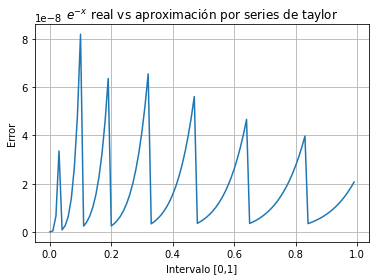

In [10]:
x=np.arange(0,1,0.01)
y=[]  #Valores aproximados
for i in x:
    y.append(e1n(i))
#print(y)
z=np.exp(-x) #valor real
#print(y)
#print(z)
plt.plot(x,abs(y-z))  #Error en la aproximación
plt.grid()
plt.title("$e^{-x}$ real vs aproximación por series de taylor")
plt.xlabel("Intervalo [0,1]")
plt.ylabel("Error")
plt.show()

## Punto 3:

Veamos para $e^{-10}$ cómo son los 15 primeros términos de su serie de taylor:

In [11]:
e(10,15)

0 1.0
1 -10.0
2 50.0
3 -166.66666666666666
4 416.6666666666667
5 -833.3333333333334
6 1388.888888888889
7 -1984.126984126984
8 2480.15873015873
9 -2755.731922398589
10 2755.731922398589
11 -2505.210838544172
12 2087.67569878681
13 -1605.9043836821616
14 1147.0745597729724


466.2223379207503

Podemos notar que los términos 9 y 10 de la serie de taylor son "idénticos" y muy grandes, por lo que muy probablemente nos genere errores de sustracción. Podemos notar esto para cualquier x tomado. Que el término x-1 y x son términos idénticos. Además, si x es grande, ese término también será grande, por lo que nuestra máquina puede tender a generar errores sustractivos o de redondeo

### C)
Construyamos de nuevo una función de $e^{-x}$ usando el truco de expresarlo como $\frac{1}{e^{x}}$

In [12]:
def e2(x):
    g=1/e1n(-x)
    return g

Ahora veamos cómo se comporta el error en un intervalo de [9,11] con un paso de 0.01

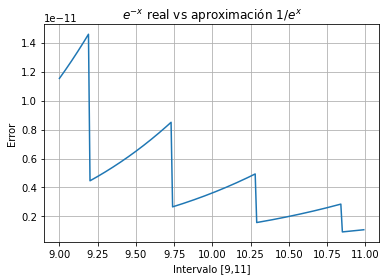

In [13]:
x=np.arange(9,11,0.01)
y=[]  #Valores aproximados
for i in x:
    y.append(e2(i))
z=np.exp(-x) #valor real
#print(y)
#print(z)
plt.plot(x,abs(y-z))  #Error en la aproximación
plt.grid()
plt.title("$e^{-x}$ real vs aproximación 1/$e^x$")
plt.xlabel("Intervalo [9,11]")
plt.ylabel("Error")
plt.show()

Podemos ver que el error disminuye y es smenor que 1e-11

### D)
Grafiquemos el intervalo de $e^x$ para [0,10] con pasos de 0.1

Text(0.5, 1.0, '$e^{-x}$ aprox')

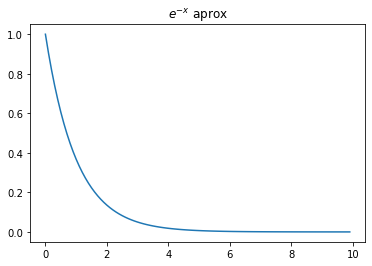

In [14]:
x=np.arange(0,10,0.1)
y=[]  #Valores aproximados
for i in x:
    y.append(e2(i))

plt.plot(x,y)
plt.title("$e^{-x}$ aprox")

Text(0.5, 1.0, '$e^{-x}$ real')

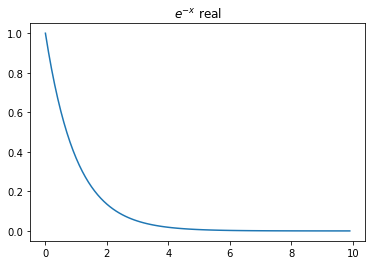

In [15]:
plt.plot(x,np.exp(-x))
plt.title("$e^{-x}$ real")

Text(0.5, 1.0, 'Error')

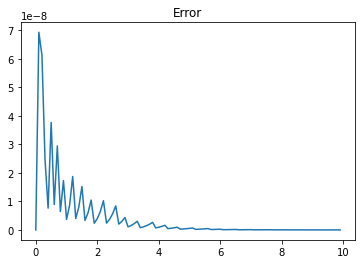

In [16]:
plt.plot(x,abs(y-np.exp(-x)))
plt.title("Error")

Ahora de [10,100]

C:\Users\DAVIDG~1\AppData\Local\Temp/ipykernel_11000/3475707713.py:8: RuntimeWarning: overflow encountered in double_scalars
  h=((-1)**(i+1))*((x**(i+1))/(np.math.factorial(i+1)))
C:\Users\DAVIDG~1\AppData\Local\Temp/ipykernel_11000/3475707713.py:7: RuntimeWarning: overflow encountered in double_scalars
  g+=((-1)**i)*((x**i)/(np.math.factorial(i)))


Text(0.5, 1.0, '$e^{-x}$ aprox')

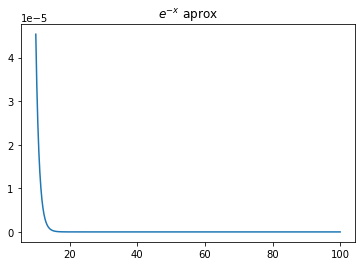

In [17]:
x=np.arange(10,100,0.1)
y=[]  #Valores aproximados
for i in x:
    y.append(e2(i))

plt.plot(x,y)
plt.title("$e^{-x}$ aprox")

Text(0.5, 1.0, '$e^{-x}$ real')

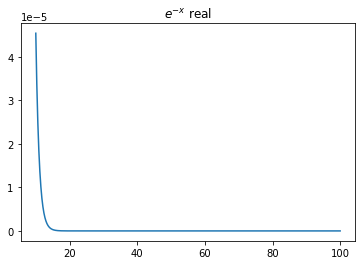

In [18]:
plt.plot(x,np.exp(-x))
plt.title("$e^{-x}$ real")

Text(0.5, 1.0, 'Error')

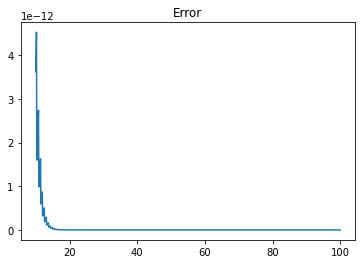

In [19]:
plt.plot(x,abs(y-np.exp(-x)))
plt.title("Error")

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

Definamos 3 funciones diferentes que nos den la misma secuencia:

In [46]:
def s1(r,x0,n=100):
    s=x0
    y=[]
    for i in range(n):
        s=r*s*(1-s)
        y.append(s)
    return s,y
def s2 (r,x0,n=100):
    s=x0
    y=[]
    for i in range(n):
        s=r*s-r*(s**2)
        y.append(s)
    return s,y
def s3(r,x0,n=100):
    s=x0
    y=[]
    for i in range(n):
        s=r*(s**2)*((1/s)-1)
        y.append(s)
    return s,y


Ahora veamos como se comportan las iteraciones dependiendo del r para x0=0,6 para cada una de las tres funciones

### Función 1

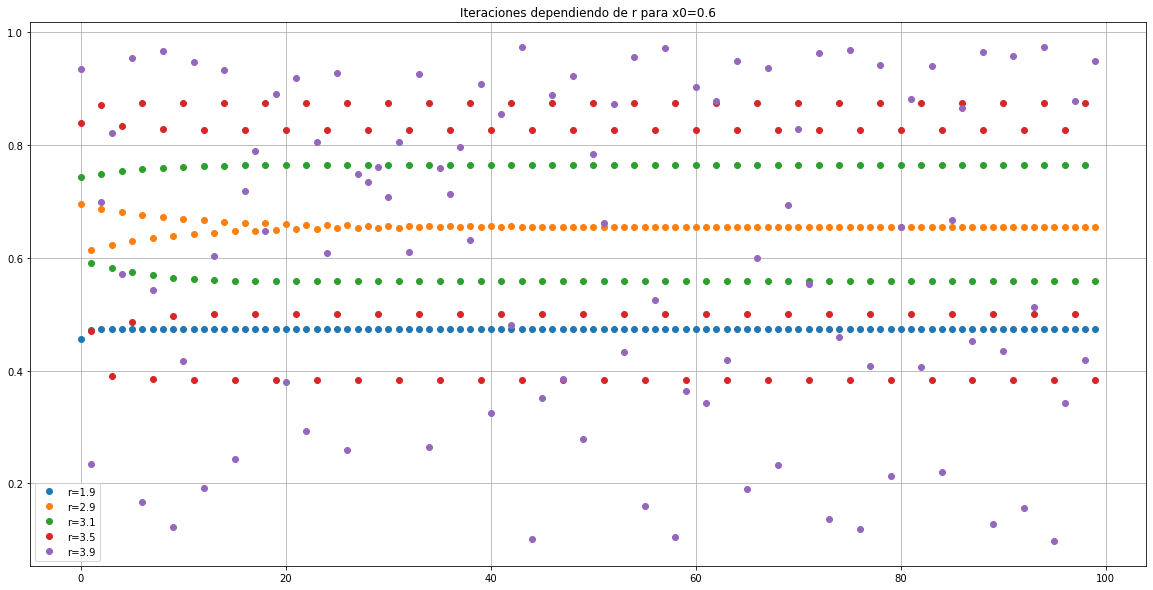

In [60]:
x=[1.9,2.9,3.1,3.5,3.9]
plt.figure(figsize=(20,10))
for i in x:
    s=str(i)
    plt.plot(np.arange(0,100),s1(i,0.6,100)[1],"o",label=("r="+s))
plt.legend()
plt.grid()
plt.title("Iteraciones dependiendo de r para x0=0.6")
plt.show()

### Función 2

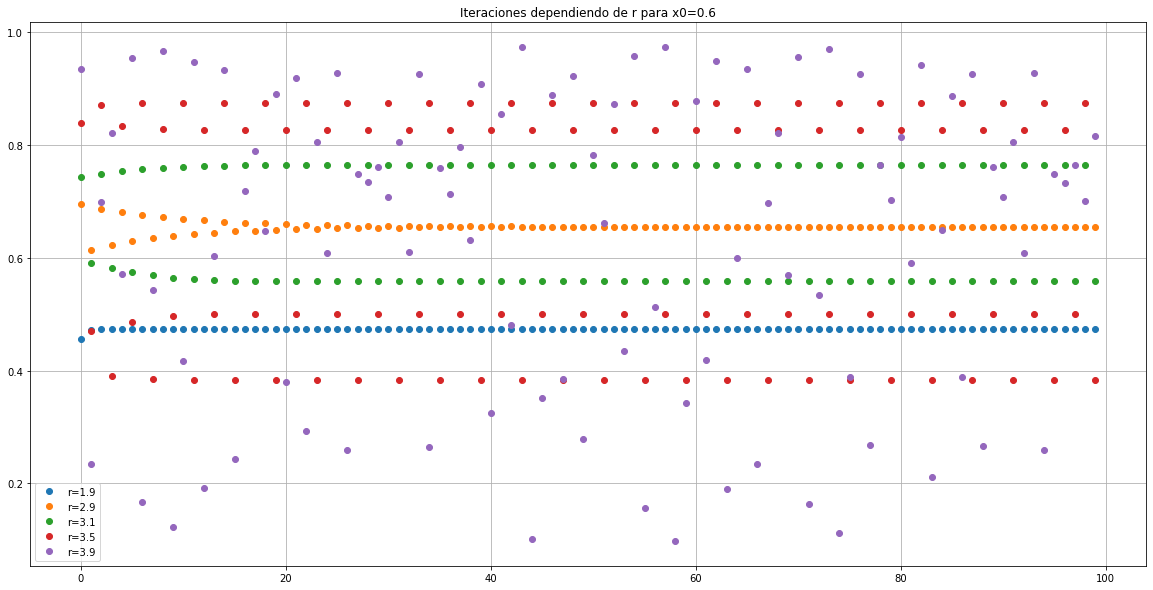

In [62]:
x=[1.9,2.9,3.1,3.5,3.9]
plt.figure(figsize=(20,10))
for i in x:
    s=str(i)
    plt.plot(np.arange(0,100),s2(i,0.6,100)[1],"o",label=("r="+s))
plt.legend()
plt.grid()
plt.title("Iteraciones dependiendo de r para x0=0.6")
plt.show()

### Función 3

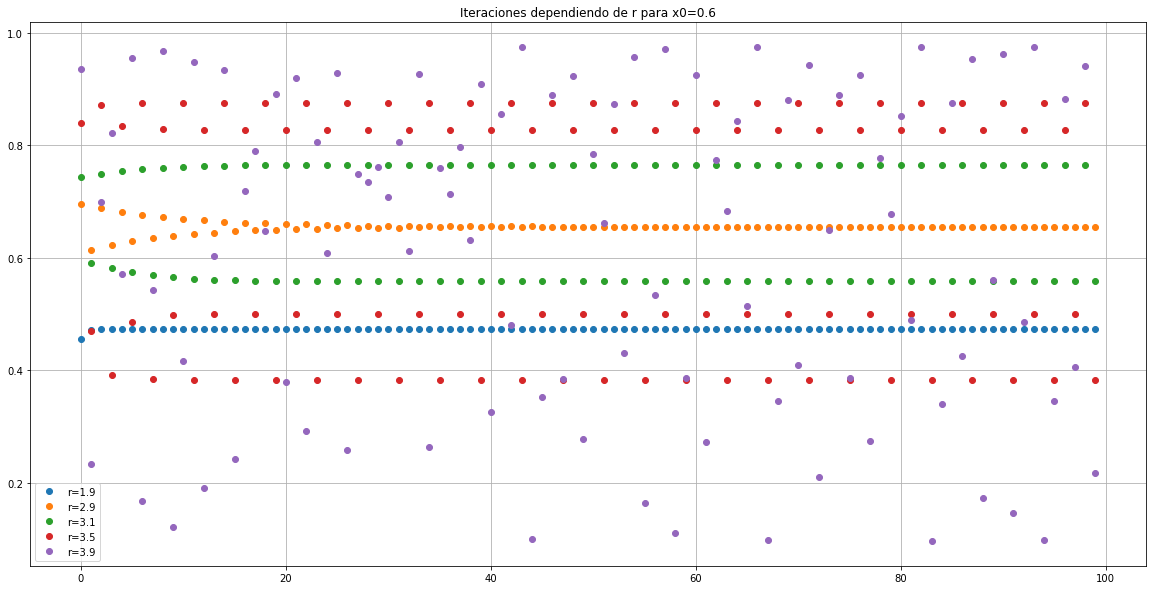

In [63]:
x=[1.9,2.9,3.1,3.5,3.9]
plt.figure(figsize=(20,10))
for i in x:
    s=str(i)
    plt.plot(np.arange(0,100),s3(i,0.6,100)[1],"o",label=("r="+s))
plt.legend()
plt.grid()
plt.title("Iteraciones dependiendo de r para x0=0.6")
plt.show()

Podemos apreciar que según el r las iteraciones se estabilican en un valor (r=1.9 y r=2.9), se estabiliza en dos valores (r=3.1), en cuatro valores (r=3.5) y se conforma de forma caótica (r=3.9)

Para todas las definiciones de las funciones, las gráficas son casi idénticas, por lo que podemos pensar que son iguales, sin embargo, cada una puede hacer los cálculos más eficientes dependiendo de cómo se comportan los valores en cada iteración.